# Analisi della Scala di Mokken {#sec-mokken}

**Prerequisiti**

- Consultare l'articolo *An instructional module on Mokken scale analysis* [@wind2017instructional].

**Concetti e Competenze Chiave**

- Comprendere la necessità di verificare empiricamente se i punteggi grezzi rappresentano dati ordinali.  
- Interpretare e utilizzare i coefficienti di scalabilità ($H$, $H_i$, $H_{ij}$) per valutare l'omogeneità monotona degli item.  
- Comprendere e sapere calcolare l'Ordinamento Invariante degli Item (IIO).  
- Comprendere la MSA come un approccio meno restrittivo rispetto allo scaling di Guttman e più flessibile rispetto ai modelli parametrici.  

**Preparazione del Notebook**

In [3]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(mirt, mokken)

## Introduzione

L'Analisi delle Scale Mokken (MSA), così chiamata in onore del matematico e scienziato politico olandese Robert J. Mokken, è un insieme di metodi basati sulla Teoria Non Parametrica della Risposta agli Item (NIRT) che consente di valutare l'adeguatezza dei dati rispetto ai modelli non parametrici. Nella Teoria della Risposta agli Item (IRT), i costrutti psicologici sono considerati latenti, cioè non direttamente osservabili, ma si manifestano attraverso le risposte ai test. Le risposte degli individui agli item di un test riflettono la loro posizione su un continuum latente e indicano il grado in cui possiedono il costrutto oggetto di misurazione.

Tuttavia, la relazione tra gli item di un test e le risposte dei partecipanti non sempre rappresenta fedelmente il costrutto in questione. I modelli della IRT offrono strumenti per esaminare la congruenza e la rilevanza degli item rispetto alla variabile latente sottostante. I modelli della MSA, in particolare, sono modelli probabilistici non parametrici basati su tratti latenti e giocano un ruolo fondamentale nella validazione degli strumenti psicometrici, ordinando sia i rispondenti che gli item lungo una scala ordinale. Applicabili sia a item dicotomici che politomici, i modelli MSA sono meno restrittivi rispetto ai modelli IRT parametrici, in quanto non assumono una forma specifica per la funzione di risposta agli item. Questa flessibilità rende i modelli MSA strumenti preziosi, pur comportando alcune limitazioni interpretative.

## Analisi delle Scale di Mokken (MSA)

L’**Analisi delle Scale di Mokken** (MSA) trova le sue radici nel modello di **Guttman**, ampliandone la portata grazie a un approccio probabilistico che supera le rigidità del modello deterministico originale. Il modello di Guttman si basa sul principio di **perfetta cumulatività**, secondo cui un rispondente che risponde correttamente a un item più difficile dovrebbe necessariamente rispondere correttamente anche a tutti gli item più semplici. Sebbene questa proprietà consenta di costruire scale gerarchiche, la sua applicazione pratica risulta spesso eccessivamente rigida, poiché non tiene conto delle naturali deviazioni che emergono nei dati empirici.

La **MSA**, grazie al suo approccio probabilistico, supera le rigidità del modello deterministico di Guttman, permettendo di gestire eventuali violazioni della cumulatività senza compromettere la rappresentazione delle relazioni tra item e tratti latenti. Questo rende la MSA più aderente alla complessità delle risposte umane, che spesso risentono di variabili esterne o di fattori imprevedibili.

Simile per filosofia al **modello di Rasch**, la MSA è meno vincolante nelle sue assunzioni, risultando più flessibile nell'adattarsi ai dati reali. Questa caratteristica la rende particolarmente utile per misurare costrutti psicologici complessi e multidimensionali. Inoltre, la sua capacità di individuare strutture sottostanti robuste ne fa uno strumento fondamentale per lo sviluppo e la validazione di scale psicometriche, garantendo al contempo una base solida per l'interpretazione e l'utilizzo dei risultati in contesti di ricerca e applicazione.

## Assunzioni dell’Analisi delle Scale di Mokken

La **MSA**, pur essendo un approccio non parametrico, condivide alcune assunzioni fondamentali con i modelli parametrici della **Teoria della Risposta agli Item** (IRT). Tuttavia, queste assunzioni vengono applicate in modo più flessibile, rendendole più adatte a situazioni in cui i dati non soddisfano i rigorosi requisiti dei modelli parametrici. Le principali assunzioni della MSA sono descritte di seguito.

## Assunzione di Unidimensionalità

L’assunzione di **unidimensionalità** richiede che le risposte agli item siano governate da un unico tratto latente, ovvero che tutti gli item della scala misurino lo stesso costrutto psicologico. Questo tratto rappresenta una variabile sottostante non osservabile che determina le risposte ai singoli item. Nella pratica, progettare scale che misurano un unico tratto latente facilita l’interpretazione dei punteggi, riduce la complessità analitica e aumenta la validità delle conclusioni.

## Assunzione di Indipendenza Locale

L’**indipendenza locale** è una delle assunzioni fondamentali nell’**Analisi delle Scale di Mokken** e più in generale nella **Teoria della Risposta agli Item** (IRT). Questa proprietà stabilisce che, una volta fissato il tratto latente $\theta$ (il livello della variabile latente che governa le risposte), le risposte agli item siano **condizionalmente indipendenti**. In altre parole, dato $\theta$, il comportamento di un rispondente su un item non influenza le sue risposte sugli altri item.

L’indipendenza locale può essere espressa formalmente come:

$$
P(X = x \mid \theta) = \prod_{i=1}^k P(X_i = x_i \mid \theta),
$$

dove:

- $X$ rappresenta il vettore delle risposte agli $k$ item ($X = (X_1, X_2, \dots, X_k)$),
- $x$ è un’istanza di risposte ($x = (x_1, x_2, \dots, x_k)$),
- $P(X_i = x_i \mid \theta)$ è la probabilità di rispondere $x_i$ all’item $i$, dato il livello del tratto latente $\theta$.

L’assunzione implica che ogni probabilità condizionata dipende esclusivamente da $\theta$ e non dalle risposte agli altri item.

L’indipendenza locale ha due conseguenze fondamentali:

1. **Covarianza nulla tra item (dato $\theta$):** La correlazione osservata tra le risposte agli item è attribuibile esclusivamente alla variabilità di $\theta$. Se il tratto latente è fissato, la covarianza tra due item qualsiasi sarà pari a zero.
2. **Rappresentazione pura del tratto latente:** Le risposte riflettono il tratto latente senza essere influenzate da altre relazioni o interazioni tra gli item (ad esempio, sovrapposizione di contenuto o sequenze logiche negli item).

Quando l’indipendenza locale non è rispettata, le risposte agli item possono essere influenzate da fattori esterni (come stanchezza, contesto, o similarità degli item) o da interazioni tra gli item stessi (ad esempio, se rispondere a un item fornisce un indizio per rispondere a un altro).

Un esempio di violazione è un **bias di contenuto**: se due item condividono un contenuto simile (ad esempio, entrambi riguardano competenze matematiche legate alle frazioni), le risposte possono essere correlate anche oltre ciò che il tratto latente $\theta$ può spiegare.

In conclusione, l’indipendenza locale garantisce che le risposte ai test riflettano esclusivamente il tratto latente, senza essere influenzate da fattori esterni o interazioni tra item. Sebbene fondamentale, questa assunzione può essere violata in situazioni pratiche, e la sua verifica è essenziale per valutare la validità di un modello di misura come l'MSA o l'IRT.

## Assunzione di Monotonicità Latente

L’assunzione di **monotonicità latente** stabilisce che, all’aumentare del tratto latente ($\theta$), la **probabilità** di rispondere correttamente a un item (nel caso dicotomico) o di scegliere una categoria di risposta più alta (nel caso politomico) debba aumentare o rimanere costante. Matematicamente:

$$
P_i(\theta_a) \leq P_i(\theta_b) \quad \text{per} \quad \theta_a \leq \theta_b,
$$

dove $P_i(\theta)$ rappresenta la probabilità di rispondere correttamente o di selezionare una risposta superiore all’item $i$.

In pratica, questo significa che i rispondenti con livelli più elevati del tratto latente hanno una maggiore probabilità di ottenere punteggi più alti, garantendo una relazione coerente e interpretabile tra tratto latente e prestazione. Questa proprietà è particolarmente importante per costruire scale che riflettano una struttura ordinale robusta.

### Verifica della Monotonicità

La **monotonicità** richiede che la probabilità di rispondere correttamente a un item aumenti (o almeno non diminuisca) con l’aumento del livello del tratto latente sottostante ($\theta$) o del **restscore** (punteggio residuo).

Il **restscore** è il punteggio totale di un soggetto sugli item di un test, **escluso** l’item che si sta analizzando. Esso rappresenta una stima indiretta del livello del tratto latente di un soggetto, basata sulle sue risposte agli altri item.

---

::: {#exm-}
Supponiamo di avere un test con 10 item e un soggetto che ha risposto nel modo seguente:

| Item     | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|----------|---|---|---|---|---|---|---|---|---|----|
| Risposta | 1 | 1 | 0 | 1 | 0 | 1 | 1 | 1 | 0 | 1  |

Se stiamo analizzando il comportamento dell’**item 10**, il **restscore** sarà calcolato come la somma delle risposte agli altri 9 item:

$$
\text{Restscore} = 1 + 1 + 0 + 1 + 0 + 1 + 1 + 1 + 0 = 6.
$$

Il restscore fornisce un’indicazione del livello complessivo di abilità del soggetto, escludendo il contributo dell’item 10.
:::

---

### Monotonicità e Funzioni di Risposta agli Item (IRF)

Per verificare la monotonicità, si analizza la relazione tra i restscore e la probabilità di rispondere correttamente a un dato item. In un modello monotono, questa relazione deve essere **non decrescente**: all’aumentare del restscore, la probabilità di una risposta corretta deve crescere o rimanere costante.

La monotonicità può essere verificata tracciando le **Funzioni di Risposta agli Item (IRF)**, che rappresentano graficamente come varia la probabilità di rispondere correttamente a un item in funzione del restscore.

---

::: {#exm-}
Consideriamo un test con 5 item e i seguenti dati aggregati (restscore e frequenze di risposte corrette all’item 5):

| Restscore | Frequenza Totale | Risposte Corrette | Probabilità Correttezza |
|-----------|------------------|-------------------|--------------------------|
| 0         | 5                | 1                 | $1/5 = 0.20$           |
| 1         | 10               | 3                 | $3/10 = 0.30$          |
| 2         | 15               | 6                 | $6/15 = 0.40$          |
| 3         | 10               | 5                 | $5/10 = 0.50$          |
| 4         | 5                | 4                 | $4/5 = 0.80$           |

Verifica della Monotonicità.

1. La probabilità di rispondere correttamente aumenta con il restscore (0.20, 0.30, 0.40, 0.50, 0.80). Questo comportamento conferma la monotonicità.
   
2. Per rappresentare visivamente questa relazione, si può tracciare un grafico:

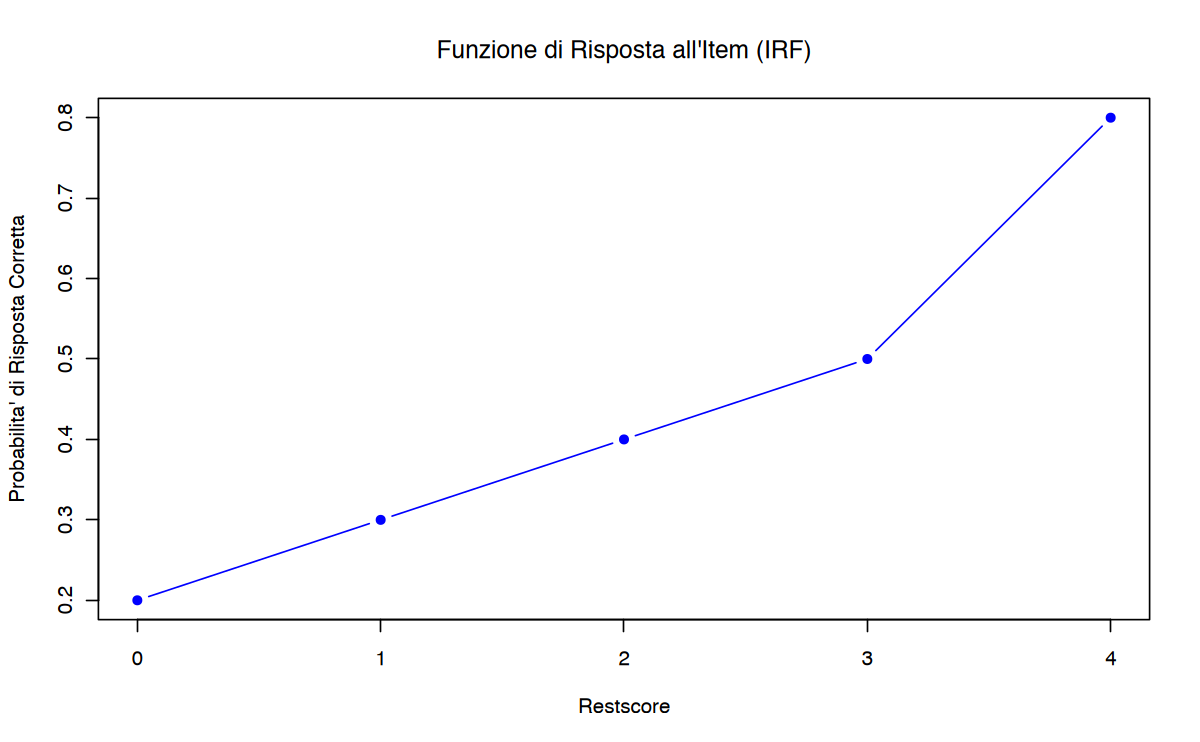

In [ ]:
restscore <- c(0, 1, 2, 3, 4)
prob_correct <- c(0.20, 0.30, 0.40, 0.50, 0.80)

# Grafico
plot(restscore, prob_correct,
    type = "b", pch = 16, col = "blue",
    xlab = "Restscore", ylab = "Probabilita' di Risposta Corretta",
    main = "Funzione di Risposta all'Item (IRF)"
)

Il grafico dovrebbe mostrare una curva **non decrescente**, confermando la monotonicità.
:::

---

### Aggregazione dei Restscores

Quando i restscore sono calcolati su un piccolo numero di rispondenti, le stime delle probabilità possono essere instabili. Per migliorare l’affidabilità, i restscore possono essere **aggregati in gruppi**.

---

::: {#exr-}
Se il numero di rispondenti con restscore pari a $0, 1$ o $2$ è troppo basso per stimare con precisione la probabilità di risposta corretta, si possono combinare i gruppi $0-2$. In tal caso:

| Gruppo Restscore | Frequenza Totale | Risposte Corrette | Probabilità Correttezza |
|-------------------|------------------|-------------------|--------------------------|
| 0-2              | 30               | 10                | $10/30 = 0.33$         |
| 3-4              | 15               | 9                 | $9/15 = 0.60$          |

Questa aggregazione riduce la variabilità statistica mantenendo il focus sulla relazione tra restscore e probabilità di risposta corretta.
:::

---

In conclusione, la verifica della monotonicità è cruciale per garantire che gli item di una scala rispettino l'assunzione fondamentale di relazione crescente tra il tratto latente (o il restscore) e la probabilità di risposta corretta. L’analisi grafica delle IRF e l’aggregazione dei restscore rappresentano strumenti pratici ed efficaci per individuare eventuali violazioni di questa proprietà.

### Monotonicità e Coefficienti di Scalabilità

Nell'MSA, la monotonicità è valutata anche attraverso i **coefficienti di scalabilità** ($H_i$ per singoli item e $H_{ij}$ per coppie di item). Per garantire la validità del Modello di Omogeneità Monotona (MHM), le covarianze tra tutte le coppie di item ($H_{ij}$) devono essere non negative. Tuttavia, la non negatività dei coefficienti di scalabilità non garantisce necessariamente che le IRF siano monotone. In pratica, item con valori di $H_i$ superiori a 0.30 sono considerati accettabili.

## Assunzione di Non-Intersezione delle Funzioni di Risposta

L'assunzione di non-intersezione delle funzioni di risposta (IRF) prevede che le probabilità di successo su item più difficili non superino mai quelle relative a item più facili, per ogni livello del tratto latente. In altre parole, le IRF devono essere ordinate in modo che la probabilità di rispondere correttamente a un item più difficile sia sempre inferiore o uguale rispetto a un item meno difficile. Formalmente, questa proprietà può essere espressa come:

$$
P_1(\theta) \leq P_2(\theta) \leq ... \leq P_k(\theta) \quad \text{per ogni} \ \theta
$$

L'intersezione delle IRF comporterebbe una violazione dell'ordinamento degli item, il che renderebbe difficile interpretare i risultati della scala.

In sintesi, l'Analisi delle Scale di Mokken si basa su assunzioni chiave simili a quelle dell'IRT, ma le implementa in un contesto non parametrico. La verifica di queste assunzioni garantisce la validità delle scale costruite e la corretta interpretazione dei risultati, rendendo l'MSA uno strumento potente per la costruzione di scale psicometriche robuste.

## Modelli della Mokken Scale Analysis

Dalle suddette assunzioni derivano due modelli della Mokken Scale Analysis:

1. **Modello di Monotonicità Omogenea** (Mokken, 1971): rispetta le prime tre assunzioni (unidimensionalità, indipendenza locale e monotonicità latente). Questo modello permette di ordinare i rispondenti in base al tratto latente.
  
2. **Modello di Doppia Monotonicità**: rispetta tutte e quattro le assunzioni (unidimensionalità, indipendenza locale, monotonicità latente e non-intersezione). Consente di ordinare non solo i rispondenti, ma anche gli item in termini di difficoltà.

## Coefficienti di Scalabilità

I **coefficienti di scalabilità** sono strumenti essenziali nell'**Analisi delle Scale di Mokken** (MSA) per valutare la qualità degli item e della scala complessiva. Questi coefficienti permettono di verificare quanto le risposte ai test seguano un ordinamento coerente lungo un continuum latente. Si basano sulla covarianza tra i punteggi degli item e i restscore (o tra coppie di item) e forniscono indicazioni chiave sulla qualità degli item e sulla capacità della scala di misurare un costrutto unidimensionale.

## Coefficiente per Singolo Item ($H_j$)

Il coefficiente $H_j$ misura la capacità di un singolo item di discriminare tra i rispondenti lungo il continuum latente. La formula è:

$$
H_j = \frac{\text{COV}(X_j, R_{-j})}{\text{COV}(X_j, R_{-j})^{\text{max}}},
$$

dove:

- $X_j$: è il punteggio del singolo item $j$,
- $R_{-j}$: è il **restscore**, cioè la somma dei punteggi di tutti gli altri item escluso $j$,
- $\text{COV}(X_j, R_{-j})^{\text{max}}$: è la covarianza massima teorica tra $X_j$ e $R_{-j}$, calcolata in assenza di errori di Guttman.

Interpretazione:

- $H_j > 0.30$: L'item contribuisce efficacemente alla scala.
- $H_j < 0.30$: L'item discrimina poco e potrebbe non essere adatto.

---

::: {#exm-}

Consideriamo un test con 4 item e i seguenti punteggi per 5 rispondenti:

| Rispondente | $X_1$ | $X_2$ | $X_3$ | $X_4$ | Restscore ($R_{-1}$) |
|-------------|---------|---------|---------|---------|-------------------------|
| A           | 1       | 1       | 1       | 0       | $1 + 1 + 0 = 2$       |
| B           | 1       | 1       | 0       | 1       | $1 + 0 + 1 = 2$       |
| C           | 0       | 1       | 0       | 0       | $1 + 0 + 0 = 1$       |
| D           | 1       | 1       | 1       | 1       | $1 + 1 + 1 = 3$       |
| E           | 0       | 0       | 0       | 0       | $0 + 0 + 0 = 0$       |

Calcoliamo:

- $\text{COV}(X_1, R_{-1})$: Covarianza tra $X_1$ e $R_{-1}$.
- $\text{COV}(X_1, R_{-1})^{\text{max}}$: Covarianza teorica massima in assenza di errori di Guttman.

Supponiamo che:

$$
\text{COV}(X_1, R_{-1}) = 0.8 \quad \text{e} \quad \text{COV}(X_1, R_{-1})^{\text{max}} = 1.
$$

Il coefficiente $H_1$ è:

$$
H_1 = \frac{\text{COV}(X_1, R_{-1})}{\text{COV}(X_1, R_{-1})^{\text{max}}} = \frac{0.8}{1} = 0.8.
$$

Questo valore indica che $X_1$ contribuisce in modo rilevante alla scala.
:::

---

## Coefficiente per Coppie di Item ($H_{ij}$)

Il coefficiente $H_{ij}$ misura la **coerenza tra due item** ($X_i$ e $X_j$) rispetto al continuum latente. Valuta quanto la relazione osservata tra i due item sia conforme al modello di omogeneità monotona, che presuppone che entrambi gli item misurino lo stesso tratto latente in modo coerente. 

Si calcola come:

$$
H_{ij} = \frac{\text{COV}(X_i, X_j)}{\text{COV}(X_i, X_j)^{\text{max}}},
$$

dove:

- $\text{COV}(X_i, X_j)$: è la covarianza osservata tra i punteggi degli item $X_i$ e $X_j$,
- $\text{COV}(X_i, X_j)^{\text{max}}$: è la **covarianza massima teorica**, calcolata assumendo **assenza di errori di Guttman** e pieno rispetto del modello di Guttman.

Interpretazione:

- **$H_{ij} > 0$:**
  - Gli item sono coerenti con il modello di omogeneità monotona.
  - Valori positivi indicano che le risposte ai due item sono ordinate in modo simile rispetto al continuum latente.

- **$H_{ij} < 0$:**
  - Potrebbero esserci problemi di:
    - **Multidimensionalità**: Gli item potrebbero misurare tratti latenti differenti.
    - **Violazioni della monotonicità**: La relazione tra i punteggi degli item potrebbe non seguire un andamento coerente con l’aumento del tratto latente.

- **$H_{ij} \approx 0$:**
  - Indica una relazione molto debole tra gli item, suggerendo che la loro associazione con il continuum latente è minima o casuale.

Nota: valori di $H_{ij}$ vicini a 1 indicano un'elevata coerenza tra gli item rispetto al modello ideale. Tuttavia, anche in presenza di $H_{ij} > 0$, valori relativamente bassi possono suggerire che gli item necessitano di una revisione o che contribuiscono in modo limitato alla scala complessiva.

---

::: {#exm-}
Supponiamo che:

- $\text{COV}(X_1, X_2) = 0.6$,
- $\text{COV}(X_1, X_2)^{\text{max}} = 1$.

Il coefficiente è:

$$
H_{12} = \frac{0.6}{1} = 0.6.
$$

Un valore positivo e relativamente alto indica coerenza tra gli item $X_1$ e $X_2$.
:::

---

## Coefficiente Complessivo della Scala ($H$)

Il coefficiente complessivo $H$ rappresenta una misura sintetica della qualità della scala nel suo insieme, combinando il contributo di tutti gli item. Valuta quanto bene le risposte degli item seguano un ordinamento coerente lungo il continuum latente, tenendo conto della covarianza osservata tra gli item e i loro restscore.

Si calcola come:

$$
H = \frac{\sum_{j=1}^J \text{COV}(X_j, R_{-j})}{\sum_{j=1}^J \text{COV}(X_j, R_{-j})^{\text{max}}},
$$

dove:

- $J$: è il numero totale di item,
- $\text{COV}(X_j, R_{-j})$: è la covarianza osservata tra il punteggio di un item $X_j$ e il suo restscore $R_{-j}$,
- $\text{COV}(X_j, R_{-j})^{\text{max}}$: è la covarianza massima teorica tra $X_j$ e $R_{-j}$, calcolata assumendo assenza di errori di Guttman.

Interpretazione dei Valori di $H$:

- $H < 0.30$: Scala debole.
  - Gli item non contribuiscono significativamente alla creazione di un ordinamento coerente.
  - La scala potrebbe essere inadeguata per misurare il costrutto latente.
  
- $0.30 \leq H < 0.40$: Scala accettabile.
  - La scala è utilizzabile, ma con limitazioni. Potrebbe richiedere una revisione o l’eliminazione di alcuni item deboli.

- $0.40 \leq H < 0.50$: Scala di qualità media.
  - La scala mostra una struttura adeguata e un buon livello di coerenza tra gli item.

- $H \geq 0.50$: Scala forte.
  - Gli item formano una scala ben costruita, con un’elevata coerenza e capacità discriminativa.

Considerazioni pratiche:

- **Valori elevati di $H$:**
  - Indicano che la scala è efficace nel distinguere i rispondenti lungo il continuum latente.
  - Riflettono una bassa presenza di errori di Guttman.
- **Valori bassi di $H$:**
  - Possono indicare che gli item non sono sufficientemente coerenti tra loro.
  - Suggeriscono la necessità di rivedere gli item o il costrutto sottostante.

In conclusione, il coefficiente complessivo $H$ valuta la qualità globale di una scala. Esso integra i contributi degli item individuali in una misura unica, permettendo di identificare eventuali debolezze nella struttura della scala e fornendo una base per migliorare la coerenza e la validità degli strumenti di misura.

---

::: {#exm-}

Supponiamo di avere una scala con 5 item ($J = 5$) e i seguenti valori:

- $\sum_{j=1}^J \text{COV}(X_j, R_{-j}) = 3.2$,
- $\sum_{j=1}^J \text{COV}(X_j, R_{-j})^{\text{max}} = 5.0$.

Il coefficiente complessivo della scala è:

$$
H = \frac{\sum_{j=1}^J \text{COV}(X_j, R_{-j})}{\sum_{j=1}^J \text{COV}(X_j, R_{-j})^{\text{max}}} = \frac{3.2}{5.0} = 0.64.
$$

Interpretazione:

- Con $H = 0.64$, la scala può essere considerata **forte**, con un’ottima capacità di misurare il costrutto latente e distinguere tra i rispondenti.
:::

---

## Errori Standard nei Coefficienti di Scalabilità

Gli **errori standard (SE)** svolgono un ruolo fondamentale nell'interpretazione dei coefficienti di scalabilità ($H$, $H_j$, $H_{ij}$) nella MSA. Forniscono una misura dell'incertezza associata alle stime e aiutano a valutare quanto il coefficiente stimato rappresenti accuratamente il valore reale nella popolazione.

Un **errore standard elevato** rispetto al coefficiente stimato indica una maggiore incertezza. Ad esempio, se $H_j = 0.30$ e $SE = 0.08$, il coefficiente potrebbe essere inferiore alla soglia accettabile di 0.30 nella popolazione, sollevando dubbi sulla scalabilità dell'item.

L'errore standard permette di costruire intervalli di confidenza per quantificare la precisione della stima. La formula per il 95% CI è:

$$
\text{95\% CI} = H_j \pm (1.96 \times SE).
$$

L'intervallo di confidenza **non descrive dove si trova il vero valore del coefficiente nella popolazione nel 95% dei campioni**. Piuttosto:

- **In un gran numero di campioni** prelevati dalla stessa popolazione, il 95% degli intervalli di confidenza calcolati includerà il vero valore del coefficiente nella popolazione.
- L'intervallo di confidenza riflette l'incertezza della stima in un campione specifico, ma non garantisce che il vero valore del coefficiente sia contenuto nell'intervallo per quel campione particolare.

---

::: {#exm-}
Se un coefficiente di scalabilità ha $H_j = 0.30$ e un errore standard di $SE = 0.10$, il 95% CI sarà:

$$
\text{95\% CI} = 0.30 \pm (1.96 \times 0.10) = [0.10, 0.50].
$$

Questo intervallo indica che, in una procedura ripetuta su molti campioni, il vero valore di $H_j$ sarà compreso tra 0.10 e 0.50 nel 95% dei casi.

---

In conclusione, la costruzione degli intervalli di confidenza tramite l'errore standard è uno strumento utile per quantificare l'incertezza associata a una stima, ma è importante ricordare che l'interpretazione corretta si basa sulla frequenza degli intervalli che includono il vero valore in campioni ripetuti, piuttosto che su una probabilità legata al valore specifico in un singolo campione.

### Fattori che Influenzano l'Errore Standard

L'errore standard è influenzato da diversi fattori, tra cui:

1. **Dimensione del campione:** 
   - Campioni più grandi riducono l'errore standard, migliorando la precisione della stima.
   - Tuttavia, anche in campioni ampi, altri fattori possono influenzare la precisione.
2. **Distribuzione dei punteggi degli item:** 
   - Distribuzioni asimmetriche o altamente polarizzate (molti punteggi estremi, ad esempio tutto 0 o tutto 1) aumentano l'errore standard.
3. **Eterogeneità degli item:**
   - Se gli item misurano costrutti diversi o non sono ben rappresentati dal modello di omogeneità monotona, i coefficienti di scalabilità diventano meno affidabili, con un conseguente aumento dell'errore standard.

### Utilizzo Pratico degli Errori Standard

Gli **errori standard** ($SE$) offrono una misura dell’incertezza associata alla stima dei coefficienti di scalabilità ($H_j$) e forniscono informazioni cruciali per valutare l’idoneità degli item in una scala psicometrica. Quando il coefficiente $H_j$ è basso o il suo intervallo di confidenza include valori inferiori alla soglia accettabile di 0.30, l’item potrebbe non essere adeguato a contribuire alla scala.

Come discusso da Mokken (1971), item con bassi coefficienti di scalabilità ($H_j$) sono spesso associati a errori di Guttman, che segnalano deviazioni dalla struttura ideale del modello di Guttman. In presenza di questi errori, le risposte degli item non seguono un ordinamento coerente rispetto al continuum latente, riducendo la capacità dell’item di classificare correttamente i rispondenti.

Crișan et al. (2020) avvertono che eliminare automaticamente gli item con bassi coefficienti di scalabilità può avere conseguenze negative:

- **Pro:** La rimozione di item con basso $H_j$ può migliorare l'affidabilità psicometrica della scala e aumentare la coerenza dei risultati.
- **Contro:** L’eliminazione indiscriminata può ridurre la **copertura del costrutto** e compromettere la validità teorica della scala, specialmente se l’item misura un aspetto unico o rilevante del costrutto latente.

Pertanto, la decisione di mantenere o rimuovere un item dovrebbe considerare sia aspetti psicometrici sia teorici.

### Criteri per Valutare gli Item

1. Validità Teorica:

   - L’item misura un aspetto centrale del costrutto latente?
   - Se l’item è fondamentale per rappresentare un sottodominio importante del costrutto, potrebbe essere mantenuto anche con un basso $H_j$.

2. Validità Psicometrica:

   - L’item contribuisce alla coerenza e alla precisione della scala?
   - Un $H_j < 0.30$ o un intervallo di confidenza che comprende valori negativi o prossimi allo zero indicano che l’item ha un contributo limitato o negativo.

In conclusione, l’analisi degli errori standard è essenziale per interpretare la precisione dei coefficienti di scalabilità e valutare l’idoneità degli item. Sebbene item con bassi $H_j$ siano spesso candidati per la rimozione, è importante considerare il loro ruolo teorico e la loro validità psicometrica nel contesto della scala complessiva. La combinazione di analisi quantitative e valutazioni teoriche garantisce una scala robusta e ben rappresentativa del costrutto latente.

---

::: {#exm-}
Item con basso $H_j$: se $H_j = 0.20$ e il 95% CI è $[0.05, 0.35]$, il coefficiente è inferiore alla soglia accettabile di 0.30. Tuttavia, prima di eliminare l’item, si dovrebbe verificare se:

- l’item copre un aspetto importante del costrutto;
- la sua rimozione influisce sull'affidabilità della scala.
:::

---

## Estensione della MSA agli Item Politomici

La MSA, inizialmente concepita per item dicotomici, è stata ampliata da Molenaar (1982a, 1997) per includere item **politomici**, come quelli tipici delle scale Likert. Questa estensione conserva i principi fondamentali della MSA per gli item dicotomici, adattandoli per affrontare le specificità degli item con più categorie di risposta.

Nel caso degli item politomici, la MSA non si limita a valutare il comportamento dell’intero item rispetto al tratto latente, ma esamina anche i singoli **"passaggi"** tra categorie di risposta consecutive. Ad esempio, in un item Likert a cinque punti (da "fortemente in disaccordo" a "fortemente d'accordo"), ci sono quattro passaggi distinti tra le categorie. Ogni passaggio rappresenta una transizione tra due categorie adiacenti, e la probabilità di effettuare questa transizione dipende dal livello del tratto latente ($\theta$).

Per ogni passaggio, viene definita una **Funzione di Risposta del Passaggio dell'Item** (*Item Step Response Function*, ISRF), che descrive la probabilità che un individuo con un certo livello di $\theta$ scelga una categoria specifica o una categoria superiore.

Le ISRF giocano un ruolo chiave nell'analisi degli item politomici. Esse:

- **Descrivono la probabilità di transizione:** Collegano la probabilità di scegliere una determinata categoria o una categoria superiore al livello del tratto latente.
- **Rappresentano il contributo di ogni passaggio:** Consentono di analizzare come ciascun passaggio tra categorie rifletta un avanzamento lungo il continuum latente.

Per un item a cinque punti, per esempio, le ISRF rappresentano le probabilità delle seguenti transizioni:

- Passaggio 1: Da "fortemente in disaccordo" a "in disaccordo o superiore."
- Passaggio 2: Da "in disaccordo" a "neutrale o superiore."
- Passaggio 3: Da "neutrale" a "d'accordo o superiore."
- Passaggio 4: Da "d'accordo" a "fortemente d'accordo."

Queste probabilità devono essere **monotone crescenti**, ossia aumentare con il livello di $\theta$.

### Assunzioni Fondamentali

L'estensione della MSA agli item politomici conserva le assunzioni centrali del modello per gli item dicotomici, ma le applica ai singoli passaggi tra categorie:

1. **Monotonicità delle ISRF:**
   - La probabilità di scegliere una categoria $k$ o superiore deve aumentare monotonicamente con il tratto latente $\theta$.
   - Ciò garantisce che le categorie siano ordinate in modo significativo e rappresentino livelli crescenti del tratto latente.

2. **Ordinamento delle categorie:**
   - Ogni categoria di risposta deve riflettere un livello progressivamente più alto del tratto latente.
   - Ad esempio, un passaggio da "neutrale" a "d'accordo" dovrebbe rappresentare un incremento significativo lungo il continuum di $\theta$.

3. **Validità del modello di omogeneità monotona:**
   - Anche per gli item politomici, il modello presuppone che gli item misurino lo stesso tratto latente in modo coerente e monotono.

L'analisi degli item politomici con la MSA offre numerosi vantaggi:

- **Misurazione più sfumata:** Permette di cogliere differenze più sottili tra i rispondenti grazie alla maggiore varietà di opzioni di risposta.
- **Approfondimento delle relazioni tra categorie:** Analizzando i singoli passaggi, si può comprendere meglio come le diverse categorie di risposta riflettano i livelli del tratto latente.
- **Adattabilità a scale Likert e simili:** La MSA estesa è particolarmente utile in contesti come l'assessment psicologico, dove le risposte politomiche sono comuni.

In conclusione, l'estensione della MSA agli item politomici amplia l'applicabilità di questo modello, rendendolo particolarmente adatto per scale con più livelli di risposta. Attraverso l’analisi dei singoli passaggi, è possibile verificare se le categorie sono coerenti con il tratto latente e se ogni passaggio rappresenta un avanzamento significativo lungo il continuum. 

## Mokken Reliability Coefficient

L'affidabilità di un test psicometrico si riferisce alla sua capacità di fornire risultati coerenti nel tempo o attraverso somministrazioni ripetute. Sebbene l’alfa di Cronbach sia l’indicatore di affidabilità più diffuso, presenta alcune limitazioni, soprattutto quando gli item non sono omogenei o quando si lavora con scale ordinali. In questi casi, il coefficiente $\rho$ di Mokken (*Mokken reliability coefficient* o $\rho_M$) rappresenta un’alternativa valida, basandosi su assunzioni meno restrittive e adattandosi meglio ai dati ordinali.

Il coefficiente $\rho$ di Mokken è una misura di consistenza interna che deriva dalla teoria della scala non parametrica di Mokken, utilizzata principalmente per dati ordinali. A differenza dell’alfa di Cronbach, $\rho$ non richiede che gli item soddisfino rigorosi criteri di omogeneità o equivalenza essenziale, rendendolo particolarmente utile in contesti in cui i dati non rispettano pienamente i presupposti della teoria classica dei test (CTT). 

Il coefficiente $\rho$ di Mokken si fonda su due principi principali:

- **Monotonicità:** la probabilità di rispondere in modo favorevole a un item aumenta con il livello della variabile latente.
- **Indipendenza locale:** le risposte agli item sono condizionalmente indipendenti dato il livello della variabile latente.

Queste assunzioni permettono una maggiore flessibilità rispetto ai modelli parametrici, come il modello di Rasch, e lo rendono idoneo per scale ordinali, come quelle Likert.

Il coefficiente $\rho$ di Mokken misura il rapporto tra la varianza spiegata dal punteggio totale ($S^2_T$) e la varianza totale osservata. La formula è la seguente:

$$
\rho = 1 - \frac{\sum_{i=1}^k S^2_i}{S^2_T},
$$

dove:

- $k$: numero di item del test,
- $S^2_i$: varianza di ciascun item,
- $S^2_T$: varianza totale del punteggio del test (somma dei punteggi degli item).

**Interpretazione di $\rho$:**

- $\rho$ varia tra 0 e 1.  
- valori vicini a 1 indicano maggiore affidabilità.  
  - **$\rho > 0.70$:** accettabile per la ricerca esplorativa.  
  - **$\rho > 0.80$:** preferibile per applicazioni pratiche.

**Vantaggi di $\rho$ di Mokken:**

1. a differenza dell’alfa di Cronbach, che assume una scala intervallare, $\rho$ può essere utilizzato con dati ordinali come le scale Likert.
2. non richiede che tutti gli item abbiano correlazioni simili (omogeneità), né che riflettano lo stesso grado di relazione con la variabile latente.
3. può essere applicato a test che non rispettano i presupposti della teoria classica dei test o di modelli parametrici più rigidi.

**Limitazioni di $\rho$ di Mokken:**

1. se gli item non rispettano l’assunzione di monotonicità, l’interpretazione del coefficiente può risultare ambigua.
2. il coefficiente è appropriato per scale unidimensionali; in presenza di più dimensioni, è necessario analizzare ogni sottoscala separatamente.

In conclusione, il coefficiente $\rho$ di Mokken è uno strumento efficace per valutare l’affidabilità di scale ordinali, offrendo un’alternativa all’alfa di Cronbach quando le assunzioni della teoria classica dei test non sono soddisfatte. Grazie alla sua flessibilità e semplicità, $\rho$ è particolarmente indicato per scale psicometriche utilizzate in contesti esplorativi o applicativi. Tuttavia, è essenziale verificare la monotonicità degli item e considerare la dimensionalità della scala per un'interpretazione accurata.

### Procedura di Selezione Automatica degli Item 

La **Procedura di Selezione Automatica degli Item** (AISP) è una metodologia impiegata nella MSA per selezionare insiemi di item che rispettino le assunzioni del Modello di Mokken (MHM). A differenza di tecniche più comuni come l'analisi fattoriale o l'analisi parallela, l'AISP non determina esplicitamente la dimensionalità dei dati. Piuttosto, si basa sui coefficienti di scalabilità per identificare gruppi di item che misurano lo stesso costrutto latente, formando così una o più scale.

#### Come Funziona l'AISP

L'AISP segue un approccio iterativo che:

1. Seleziona l’item iniziale, valutato come più rappresentativo di una dimensione, utilizzando il **coefficiente di scalabilità individuale** ($H_i$).
2. Successivamente, analizza le **coppie di item** ($H_{ij}$) per identificare un insieme scalabile di item che misurano lo stesso costrutto.

Un item viene incluso in una scala se:

- Il suo coefficiente di scalabilità individuale ($H_i$) supera una soglia predefinita ($c$, solitamente pari a 0.30);
- La covarianza tra ogni coppia di item ($H_{ij}$) è positiva e superiore alla stessa soglia.

Se un item non soddisfa questi criteri, la procedura tenta di assegnarlo a una nuova scala. Questo processo iterativo continua finché tutti gli item non sono stati assegnati a una scala o esclusi come non scalabili.

#### Criteri di Selezione

1. **Coefficiente di scalabilità individuale ($H_i$)**: Ogni item deve mostrare una buona capacità di discriminazione lungo la dimensione latente, con un valore di $H_i > c$.  
2. **Coefficiente di scalabilità di coppia ($H_{ij}$)**: Gli item di una scala devono essere correlati positivamente e mostrare coerenza con il costrutto misurato.

La procedura inizia selezionando la coppia di item con il valore più alto di $H_{ij}$. Successivamente, vengono aggiunti nuovi item che rispettano i criteri sopra descritti. Gli item esclusi per una scala possono essere testati per formarne altre, ma se non soddisfano i criteri per alcuna scala, vengono classificati come non scalabili.

#### Caratteristiche dell'AISP

- **Scalabilità**: Gli item selezionati formano scale che misurano un tratto latente comune e sono in grado di ordinare i rispondenti lungo il continuum del costrutto.
- **Neutralità rispetto alla difficoltà degli item**: L’AISP non è influenzata dalla distribuzione delle risposte o dalla difficoltà degli item, rendendola adatta sia per item dicotomici sia politomici.
- **Rigorosità statistica**: La procedura non forza soluzioni. Se nessuna coppia di item soddisfa i criteri di scalabilità ($H_{ij} > c$), non viene generata alcuna scala, a differenza dell'analisi fattoriale, che potrebbe imporre soluzioni anche in presenza di dati incoerenti.

#### Soglia ($c$) e Implicazioni

La scelta della soglia $c$ è cruciale:

- **Valore alto di $c$**: Maggiore precisione nella selezione degli item, ma rischio di escluderne troppi, riducendo la lunghezza della scala e la copertura del costrutto.
- **Valore basso di $c$**: Aumenta il numero di item inclusi, ma rischia di compromettere la coerenza e la validità della scala.

Un valore comunemente utilizzato è $c = 0.30$, che rappresenta un buon equilibrio tra inclusività e rigore. Tuttavia, il valore ottimale dipende dagli obiettivi dello studio e dalla natura dei dati.

#### Limitazioni dell'AISP

1. **Relazioni tra dimensioni**: L’AISP può risultare meno efficace in presenza di dimensioni fortemente correlate o di item che saturano su più dimensioni, poiché non distingue esplicitamente tali situazioni.
2. **Dipendenza dai dati statistici**: L’AISP si basa esclusivamente sui coefficienti di scalabilità e non considera le relazioni teoriche tra gli item. Questo può portare all'inclusione di item con scarso valore teorico o alla loro esclusione inappropriata.
3. **Unidimensionalità richiesta**: Gli item selezionati da una scala devono riflettere un unico costrutto. In caso di multidimensionalità, occorre considerare scale separate.

In conclusione, l'AISP offre un'alternativa flessibile all'analisi fattoriale per la costruzione di scale psicometriche, particolarmente utile quando si lavora con dati ordinali. Sebbene non forzi soluzioni e tenga conto della scalabilità degli item, è fondamentale integrarla con considerazioni teoriche per garantire che le scale siano valide e utili nel contesto di applicazione.

## Ordinamento Invariante degli Item (IIO)

L'**Ordinamento Invariante degli Item** (*Invariant Item Ordering*, IIO) è un concetto chiave nell'ambito delle scale di Mokken, che garantisce che l'ordine di difficoltà degli item rimanga costante attraverso diversi sottogruppi di persone nella popolazione target. Questo principio assicura che le differenze nei punteggi totali riflettano differenze effettive nel costrutto latente misurato, e non siano influenzate da variazioni nell'interpretazione o nella difficoltà percepita degli item.

### Cos'è l'IIO?

L'IIO richiede che gli item di una scala possano essere ordinati in base alla loro difficoltà in modo stabile e uniforme per tutti i partecipanti, indipendentemente dalle loro caratteristiche personali (ad esempio, abilità, età, genere o livello del tratto misurato). In pratica, questo significa che:

- Un partecipante con un punteggio totale più alto deve avere una probabilità maggiore di rispondere correttamente (o positivamente) a ogni item rispetto a un partecipante con un punteggio totale più basso.
- Gli item più difficili devono rimanere tali per tutti i partecipanti, e lo stesso vale per quelli più facili.

### Perché l'IIO è importante?

1. **Validità dei confronti**  
   L'IIO garantisce che i punteggi totali siano interpretabili in modo uniforme tra gruppi diversi. Se l'ordine degli item varia tra sottogruppi, i punteggi totali potrebbero non riflettere effettivamente il costrutto latente, compromettendo la validità dei confronti tra gruppi.

2. **Interpretazione coerente**  
   Permette di interpretare i punteggi del test in modo uniforme per tutti i partecipanti, indipendentemente dalle loro caratteristiche. Ad esempio, in una scala sulla depressione, un punteggio più alto indica costantemente una maggiore gravità, e la progressione degli item da più semplici (es. stanchezza) a più complessi (es. ideazione suicidaria) è coerente.

3. **Identificazione di bias e DIF**  
   L'IIO consente di rilevare la **Funzione Differenziale degli Item** (*Differential Item Functioning*, DIF) e bias che potrebbero indicare che un item è percepito in modo diverso da sottogruppi specifici. Ad esempio, un item potrebbe essere interpretato diversamente in base al genere o al contesto culturale.

### IIO nei Test Psicologici 

Nell'ambito dei test psicologici (come scale per ansia o depressione) l'IIO implica che:

- Un individuo con un punteggio totale più alto debba manifestare tutti i sintomi o le competenze presenti in un individuo con un punteggio inferiore, più eventuali sintomi o competenze aggiuntive.  
  Ad esempio, una persona con una gravità depressiva maggiore (punteggio più alto) dovrebbe rispondere positivamente a item più gravi oltre che a quelli più lievi.
- La difficoltà degli item deve essere ordinata in modo invariato per tutti i partecipanti.  
  Ad esempio, un problema matematico considerato più difficile deve esserlo per tutti gli studenti, indipendentemente dal livello generale di abilità.

### Come Verificare l'IIO?

La verifica dell'IIO può essere effettuata attraverso diverse tecniche statistiche:

1. **Metodo dei gruppi di restscore**  
   Gli item vengono confrontati tra gruppi di partecipanti suddivisi in base ai punteggi totali, escluso l’item in esame. Questo approccio consente di analizzare se l’ordine degli item rimane costante nei diversi livelli del costrutto.

2. **Proporzioni $P(++)$ e $P(--)$**  
   Si analizzano le proporzioni di risposte positive ($P(++)$) o negative ($P(--)$) per coppie di item. Per rispettare l’IIO, le proporzioni devono essere coerenti con l’ordine di difficoltà teorico.

3. **Test di monotonicità**  
   Utilizzato per verificare che la probabilità di una risposta positiva a un item aumenti con il livello del punteggio totale. Questo è un presupposto fondamentale per l’IIO.

4. **Analisi di divisione del restscore**  
   I restscore vengono divisi in intervalli e si valuta se l’ordine degli item rimane invariato in base a questi sottogruppi.

### Cosa Succede se l'IIO Non È Rispettato?

Se l'IIO viene violato, si possono verificare le seguenti problematiche:

- **Presenza di DIF o bias**  
   Gli item possono riflettere caratteristiche diverse da quelle del costrutto latente, rendendo i confronti tra sottogruppi non validi.
- **Punteggi totali non interpretabili**  
   Le differenze nei punteggi totali potrebbero non riflettere differenze reali nel costrutto latente, invalidando il test.
- **Compromissione della validità costruttuale**  
   La violazione dell'IIO può mettere in dubbio la capacità della scala di misurare un costrutto latente comune.

### Vantaggi e Limiti dell'IIO

L'IIO offre vantaggi importanti:

- Permette una valutazione uniforme e interpretabile dei punteggi totali.
- Aiuta a identificare potenziali bias negli item.
- Si applica sia a dati dicotomici che politomici, rendendolo versatile.

Tuttavia, presenta anche alcune limitazioni:

- **Difficoltà di verifica**: La verifica empirica dell'IIO richiede analisi specifiche che non sempre vengono incluse negli studi psicometrici.
- **Sensibilità alla dimensionalità**: L’IIO è rilevante solo per scale unidimensionali. In caso di scale multidimensionali, è necessario verificare l’IIO separatamente per ciascuna dimensione.
- **Rigidità**: Un eccessivo focus sull’IIO potrebbe portare all’esclusione di item potenzialmente utili ma che non rispettano perfettamente i criteri.

In conclusione, l'Ordinamento Invariante degli Item è un requisito fondamentale per garantire la validità e l'affidabilità delle scale di Mokken e di altri strumenti psicometrici. La sua verifica permette di assicurare che i punteggi totali siano interpretabili in modo coerente e che gli item riflettano realmente il costrutto latente. Tuttavia, per una valutazione completa, l’IIO dovrebbe essere integrato con altre analisi psicometriche e una riflessione teorica sui contenuti della scala, specialmente in contesti clinici o educativi dove accuratezza e validità sono essenziali.

## Dimensione del Campione

La determinazione della dimensione del campione è un aspetto cruciale nella ricerca psicometrica. Sebbene esistano linee guida consolidate per molti test statistici, l'MSA rappresenta un'area in cui la ricerca sulla dimensione del campione è ancora limitata. Questa lacuna pone sfide per i ricercatori, che devono bilanciare l'accuratezza dei risultati con le risorse disponibili.

Campioni troppo piccoli possono portare a due rischi principali:  

1. **Falsi positivi**: una scala viene erroneamente identificata come valida in un campione ridotto, quando in realtà non esiste nella popolazione.  
2. **Falsi negativi**: una scala realmente esistente non viene rilevata a causa della scarsa potenza statistica del campione.  

Diversi studi hanno esplorato le dimensioni minime del campione necessarie per applicare correttamente l’MSA, con particolare attenzione a procedure come l’Automated Item Selection Procedure (AISP) e l’Algoritmo Genetico (GA).

**Studio di Straat et al. (2014).**
Straat e colleghi hanno investigato come diversi fattori influenzino la dimensione del campione necessaria, tra cui la lunghezza del test, i valori dei coefficienti di scalabilità ($H_i$) e la correlazione tra dimensioni sottostanti nella scala.

Risultati principali:

- **Il valore di $H_i$** è stato identificato come il fattore più influente:  
  - Per valori bassi di $H_i$ (es. $H_i \approx 0.22$), erano necessari campioni molto grandi (750-2500 partecipanti) per ottenere una classificazione accurata.  
  - Per valori moderati o alti di $H_i$ (es. $H_i \approx 0.42$), campioni più piccoli (50-250 partecipanti) erano sufficienti.  
- **La lunghezza del test** ha avuto un impatto minore sulla precisione. Test più lunghi non hanno necessariamente richiesto campioni più grandi.  
- **La correlazione tra dimensioni** ha interagito con $H_i$, influenzando la necessità di campioni più grandi per scale multidimensionali.

Linee guida suggerite da Straat et al.:  

- Per $H_i \approx 0.22$:  
  - Precisione moderata: 750-1000 partecipanti.  
  - Precisione alta: almeno 1250-2500 partecipanti.  
- Per $H_i \approx 0.42$:  
  - Precisione moderata: 50 partecipanti.  
  - Precisione alta: almeno 250 partecipanti.

**Studio di Watson et al. (2018).**
Watson e colleghi hanno utilizzato dati reali per analizzare l’effetto della dimensione del campione sui coefficienti di scalabilità ($H$ e $H_i$). Lo studio includeva 7510 partecipanti e un questionario di 14 item con scala Likert a 5 punti. Sono stati generati campioni di diverse dimensioni (da 50 a 1000 partecipanti) utilizzando tecniche di bootstrapping.

Risultati principali:

1. **Valori medi di $H$ e $H_i$**: Non variavano significativamente tra campioni di dimensioni diverse, suggerendo una certa stabilità delle stime puntuali anche per campioni più piccoli.  
2. **Intervalli di confidenza (CI)**:  
   - Campioni piccoli ($N = 50$) producevano intervalli di confidenza molto ampi. In oltre il 50% dei casi, il limite inferiore del CI per $H_i$ era inferiore alla soglia critica di 0.30.  
   - Campioni grandi ($N = 1000$) producevano intervalli più stretti, con valori di $H_i$ sempre superiori a 0.30.  
3. **Errori standard**: Campioni piccoli aumentavano la probabilità di errori nella classificazione degli item, portando a decisioni sbagliate sull'inclusione/esclusione.

### Implicazioni per la Ricerca

**Precisione delle stime.**  Mentre i valori medi di $H$ e $H_i$ possono rimanere relativamente stabili, la dimensione del campione influenza notevolmente la larghezza degli intervalli di confidenza. Stime puntuali apparentemente affidabili potrebbero nascondere elevata incertezza per campioni piccoli.

**Decisioni sugli item.** Campioni piccoli aumentano il rischio di errori nella selezione degli item, compromettendo la validità della scala. Un'adeguata dimensione del campione è essenziale per garantire la qualità delle decisioni basate sui coefficienti di scalabilità.

**Bilanciamento tra risorse e precisione.** Non sempre è pratico utilizzare campioni molto grandi. Tuttavia, quando le risorse sono limitate, è cruciale pianificare attentamente la dimensione del campione per ottimizzare l’efficienza senza sacrificare la precisione.

In conclusione, la determinazione della dimensione del campione nell’MSA dipende da variabili chiave come il coefficiente di scalabilità $H_i$, la lunghezza della scala e la struttura multidimensionale dei dati. Sebbene campioni più grandi siano generalmente preferibili per ottenere risultati più precisi e intervalli di confidenza più stretti, non sempre sono necessari.  

Futuri studi potrebbero fornire indicazioni più dettagliate, sviluppando simulazioni e linee guida empiriche che aiutino i ricercatori a determinare la dimensione ottimale del campione per specifici scenari applicativi. L’obiettivo finale rimane quello di bilanciare precisione e praticità, garantendo risultati validi senza spreco di risorse.

## Confronto tra il Modello di Rasch e la MSA

Il Modello di Rasch (RM) e la MSA rappresentano due approcci distinti alla teoria della risposta all’item (IRT), ciascuno con caratteristiche e assunzioni specifiche che influenzano la loro applicabilità. Mentre il RM è un modello parametrico altamente restrittivo, l’MSA appartiene alla categoria dei modelli non parametrici, offrendo maggiore flessibilità nell’analisi dei dati.

Il Modello di Rasch si basa su una relazione parametrica tra l’abilità del rispondente ($\theta$) e la difficoltà dell’item ($\delta$), descritta da una funzione logistica. Questo implica che la probabilità di risposta corretta a un item dipende esclusivamente da $\theta$ e $\delta$ e che le curve caratteristiche degli item (IRFs) sono parallele e hanno la stessa pendenza. Una delle caratteristiche distintive del RM è che i punteggi grezzi totali sono sufficienti per stimare i parametri delle persone e degli item, rendendo possibile una scala metrica comune che consente confronti diretti e indipendenti da campione e item. Tuttavia, questa precisione deriva da assunzioni stringenti, come la necessità di unidimensionalità, monotonicità e indipendenza locale delle risposte.

L’MSA, invece, appartiene ai modelli non parametrici della IRT (NIRT), che non vincolano le IRFs a una forma specifica. Questo approccio si concentra sull’ordinamento delle persone lungo una scala latente, senza stimare direttamente $\theta$, ma utilizzando i punteggi grezzi per determinare un ordine relativo. La maggiore flessibilità dell’MSA consente di analizzare dati che non soddisfano le rigide assunzioni parametriche del RM, rendendolo particolarmente utile per scale ordinali o situazioni in cui le IRFs non seguono una forma logistica.

Il **Modello di Monotonicità Omogenea** (MHM), il più semplice tra i modelli di Mokken, si basa su tre assunzioni: unidimensionalità, monotonicità e indipendenza locale. Questo modello consente di ordinare le persone su una scala unidimensionale ordinale, garantendo che l’ordine sia coerente per tutti gli item. Una variante più restrittiva, il **Modello di Monotonicità Doppia** (DMM), aggiunge il requisito che le IRFs non si intersechino, permettendo così di produrre scale ordinali distinte sia per persone che per item. In entrambi i casi, il punteggio grezzo totale fornisce informazioni utili senza dover stimare direttamente parametri come $\theta$.

Una differenza cruciale tra il Modello di Rasch e l’MSA riguarda il tipo di scala che producono. Il RM genera una scala metrica comune per persone e item, consentendo misurazioni precise e confronti generalizzabili. L’MSA, invece, si limita a scale ordinali, dove l’ordine relativo è garantito ma non vi è una misura metrica assoluta. Questa differenza riflette il maggiore rigore del RM rispetto alla flessibilità dell’MSA. Inoltre, mentre il RM richiede che gli item seguano una funzione logistica, l’MSA permette l’inclusione di item che non rispettano questa forma, evitando così di scartare dati potenzialmente utili.

Dal punto di vista applicativo, il RM è particolarmente indicato in contesti in cui la precisione e la generalizzabilità sono fondamentali, come nei test standardizzati. Tuttavia, la sua rigidità può limitarne l’uso con dati complessi o non conformi alle sue assunzioni. L’MSA, al contrario, offre un’opzione più flessibile per l’analisi esplorativa e per dati ordinali o non lineari, risultando utile in ambiti come la psicologia e le scienze sociali. La scelta tra i due dipende dagli obiettivi dello studio e dalle caratteristiche specifiche dei dati.

## Confronto tra la CTT e la MSA

La CTT e la MSA rappresentano due approcci distinti alla misurazione psicometrica, ciascuno con i propri punti di forza e limiti. Sebbene condividano alcune somiglianze concettuali, si differenziano in modo significativo per quanto riguarda le assunzioni, la flessibilità e la capacità di testare empiricamente i modelli.

La CTT si basa su un insieme di assunzioni fondamentali che guidano l'interpretazione dei punteggi dei test. In questo framework, il punteggio osservato è la somma di un punteggio vero e di un errore di misura. Si assume che l'errore abbia una media di zero su prove ripetute, che sia non correlato con i punteggi veri, e che i punteggi di errore di due test somministrati agli stessi individui siano non correlati. I punteggi grezzi totali vengono considerati un'indicazione diretta delle posizioni dei soggetti sul continuum del tratto latente, mentre la proporzione di risposte corrette misura la facilità degli item, e la correlazione corretta tra un item e il punteggio totale del test ne determina la capacità discriminativa. L'affidabilità, intesa come correlazione tra punteggi osservati su due forme parallele dello stesso test, costituisce un aspetto cruciale della CTT.

Dal punto di vista metodologico, la CTT e la MSA condividono alcune somiglianze. Ad esempio, il **coefficiente di scalabilità dell’item** ($H_i$) nella MSA è concettualmente simile alla correlazione corretta tra un item e il punteggio totale del test nella CTT. Inoltre, il **coefficiente di scalabilità tra coppie di item** ($H_{ij}$) nella MSA può essere paragonato alle correlazioni tra coppie di item nella CTT. Infine, il **coefficiente di scalabilità complessivo** ($H$) nella MSA è analogo agli indici di discriminazione media degli item nella CTT. Questi paralleli rendono i due approcci confrontabili nella loro capacità di descrivere i dati dei test.

Tuttavia, esistono differenze sostanziali tra i due approcci. La CTT si basa su modelli teorici che non possono essere testati direttamente con i dati, poiché si assume implicitamente che le sue condizioni siano soddisfatte. Al contrario, la MSA permette di verificare empiricamente le assunzioni che ne stanno alla base, come l’indipendenza locale, l’unidimensionalità e la monotonicità. Ad esempio, un coefficiente di scalabilità negativo in un modello di Mokken smentirebbe gli assiomi del Modello di Monotonicità Omogenea (MHM), evidenziando che i dati non sono coerenti con il modello. Questa capacità di testare empiricamente le assunzioni rende la MSA più robusta e trasparente rispetto alla CTT.

La CTT offre un quadro teorico consolidato e intuitivo per interpretare i punteggi dei test, ma presenta limitazioni nei contesti in cui le assunzioni non possono essere verificate o quando i dati violano condizioni fondamentali, come l'unidimensionalità. La MSA, d'altra parte, si distingue per la sua maggiore flessibilità, consentendo l'analisi di dati ordinali e la valutazione della struttura sottostante dei dati in modo più rigoroso. Questa flessibilità la rende particolarmente utile per l'analisi esplorativa di scale e per la validazione di strumenti psicometrici.

In sintesi, la CTT e la MSA non sono necessariamente in opposizione, ma piuttosto complementari. La CTT fornisce una base teorica utile per la misurazione, mentre la MSA aggiunge strumenti pratici per testare empiricamente la validità delle scale e la struttura dei dati. L'integrazione di entrambi gli approcci può fornire una comprensione più approfondita e completa dei dati psicologici.

## Riflessioni Conclusive

Il tema centrale di questo capitolo ha riguardato la necessità di mettere in discussione l'assunzione, spesso implicita nella CTT, che i punteggi grezzi rappresentino dati ordinali. Tale presupposto, lungi dall'essere scontato, richiede una verifica empirica per evitare interpretazioni fuorvianti. In questo contesto, la MSA offre strumenti potenti per validare empiricamente questa ipotesi. I coefficienti di scalabilità ($H$, $H_i$, $H_{ij}$) permettono di dimostrare che un test misura effettivamente un costrutto unidimensionale, mentre il principio dell'Ordinamento Invariante degli Item (IIO) garantisce che tale misurazione sia precisa e coerente attraverso tutti i livelli di abilità dei rispondenti.

L'MSA rappresenta un'importante evoluzione metodologica rispetto allo scaling di Guttman, offrendo un approccio meno restrittivo e più flessibile nell’analisi dei dati empirici. La sua applicazione consente di esaminare in dettaglio la struttura delle risposte agli item e di valutare la relazione tra i punteggi dei rispondenti e il costrutto latente. In definitiva, la MSA fornisce un utile quadro analitico per validare la qualità degli strumenti di misurazione psicologica.